# Simulation models
* Stochastic processes: an ongoing process where the next stage might depend on both the previous states and some random element
* Simulations always useful eventhough sample probability != actual probability
    * the closed-form result of the actual probability can be complicated & hard to calculate. 
    * can be used to extract useful intermediate results
    * can lend themselves to development of successive refinement and "what if" qns



## Example
* What's the probability of at least 2 ppl in a group having the same birthday?
* What if at least 3 ppl? Hard to calculate mathematically; but changing the simulation is dead easy
* All dates are note equally likely -> also easy to change the simulation model

In [ ]:
def sameDate(numPeople, numSame):
    possibleDates = range(366)
#    possibleDates = 4*list(range(0, 57)) + [58]\
#                    + 4*list(range(59, 366))\
#                    + 4*list(range(180, 270))
    birthdays = [0]*366
    for p in range(numPeople):
        birthDate = random.choice(possibleDates)
        birthdays[birthDate] += 1
    return max(birthdays) >= numSame

def birthdayProb(numPeople, numSame, numTrials):
    numHits = 0
    for t in range(numTrials):
        if sameDate(numPeople, numSame):
            numHits += 1
    return numHits/numTrials

import math

for numPeople in [10, 20, 40, 100]:
    print('For', numPeople,
          'est. prob. of a shared birthday is',
          birthdayProb(numPeople, 2, 10000))
    numerator = math.factorial(366)
    denom = (366**numPeople)*math.factorial(366-numPeople)
    print('Actual prob. for N = 100 =',
          1 - numerator/denom)

# Random walks

In [21]:
# start by defining classes
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [22]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [26]:
def walk(f, d, numSteps):         # one trial
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))
    
def simWalks(numSteps, numTrials, dClass):     # multiple trials
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

In [27]:
def drunkTest(walkLengths, numTrials, dClass):     # result reporting
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))
        
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.863
 Max = 7.2 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 8.296
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 27.297
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 89.241
 Max = 226.5 Min = 10.0


In [28]:
def simAll(drunkKinds, walkLengths, numTrials):   # result reporting
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        
random.seed(0)
simAll((UsualDrunk, MasochistDrunk),
       (1000, 10000), 100)

UsualDrunk random walk of 1000 steps
 Mean = 26.828
 Max = 66.3 Min = 4.2
UsualDrunk random walk of 10000 steps
 Mean = 90.073
 Max = 210.6 Min = 7.2
MasochistDrunk random walk of 1000 steps
 Mean = 58.425
 Max = 133.3 Min = 6.7
MasochistDrunk random walk of 10000 steps
 Mean = 515.575
 Max = 694.6 Min = 377.7


## Visualising the trend

In [31]:
import pylab
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [32]:
def simDrunk(numTrials, dClass, walkLengths):   # multiple trials
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    pylab.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of MasochistDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


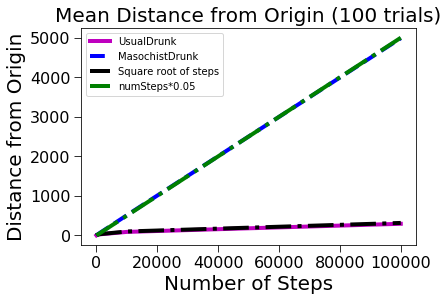

In [33]:
random.seed(0)
numSteps = (10,100,1000,10000,100000)
simAll((UsualDrunk, MasochistDrunk), numSteps, 100)

pylab.plot(numSteps, pylab.array(numSteps)**0.5, 'k-.',
           label = 'Square root of steps')
pylab.plot(numSteps, pylab.array(numSteps)*0.05, 'g-.',
           label = 'numSteps*0.05')
pylab.legend(loc = 'best')

In [38]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    pylab.ylim(-1000, 1000)
    pylab.xlim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower center')

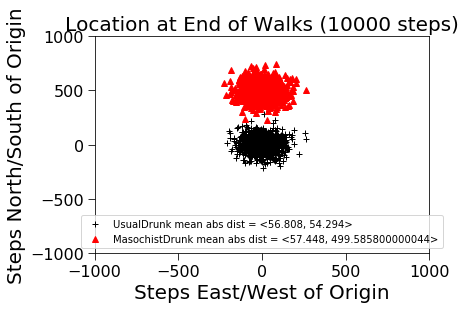

In [39]:
random.seed(0)
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

## Fields with wormholes

In [40]:
class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

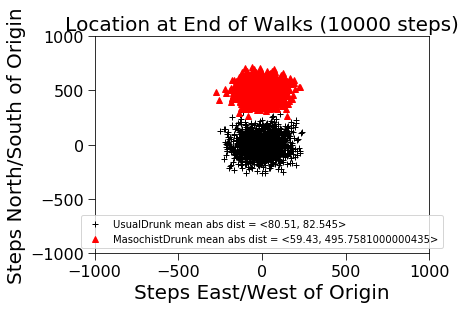

In [42]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = OddField()                    #only changed this
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    pylab.ylim(-1000, 1000)
    pylab.xlim(-1000, 1000)
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower center')
random.seed(0)
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

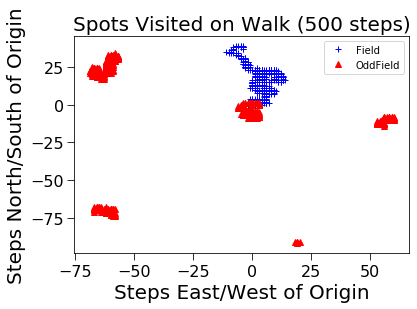

In [43]:
#TraceWalk using oddField          
def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(('b+', 'r^', 'ko'))
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                   label = fClass.__name__)
    pylab.title('Spots Visited on Walk ('
                + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')

random.seed(0)
traceWalk((Field, OddField), 500)

# Monte Carlo Simulation
* method of estimating the value of an unknown quantity using the principles of inferential statistics
* Inferential statistics
    * population
    * sample
    * key fact: a random sample tends to ehibit the same properties as the population from which it is drawn
* Law of large numbers: In repeated independent tests with the same actual probability p of a particular outcome in each test, the chance that the fraction of times that outcome occurs differs from p converges to zero as the number of trials goes to infinity
    * It does not mean that if deviations from expected behavior occur, these deviations are likely to be evened out by opposite deviations in the future. i.e. by independence, if you win 15 consecutive times, you are not more likely to lose the 16th time.
    * But regression to mean is true: Following an extreme random event, the next random event is likely to be less extreme. i.e. in the next 15 consecutive spins, it is likely to get fewer than 15 wins. (Not like it's likely to get negative wins)
* Confidence interval
    * e.g. a 95% CI is a range that is likely to contain the unknown value with a confidence level of 95%
    * To calculate CI
        * ~68% of data within 1 standard deviation of mean
        * ~95% of data within 1.96 standard deviation of mean
        * ~99.7% of data within 3 standard deviation of mean
        * so e.g. 95% CI is sample mean +- 1.96 * sample std
    * Assumptions taken
        * the mean estimation error is zero (Sample mean = population mean)
        * the distribution of the error is normal

In [44]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1    # so that the game is fair - expetation gain = 0
    def spin(self):
        self.ball = random.choice(self.pockets)    # winning one
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else:
            return -amt
    def __str__(self):
        return 'Fair Roulette'

In [47]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

random.seed(0)
game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%



In [49]:
# but real Roulettes are not fair
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'
    
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
        
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 6.56%
Exp. return for European Roulette = -2.26%
Exp. return for American Roulette = -8.92%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.234%
Exp. return for European Roulette = -4.168%
Exp. return for American Roulette = -5.752%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.8144%
Exp. return for European Roulette = -2.6506%
Exp. return for American Roulette = -5.113%

Simulate 20 trials of 1000000 spins each
Exp. return for Fair Roulette = -0.0723%
Exp. return for European Roulette = -2.7329%
Exp. return for American Roulette = -5.212%
